In [2]:
import os,math,sys, numpy as np, pandas as pd
import scipy
from scipy import linalg
from numpy import dot
from collections import defaultdict
from sklearn.cluster import KMeans
import glob
import matplotlib.pyplot as plt
from scipy.spatial import distance

In [14]:
filetype='{0}'.format(sys.argv[1])
filetype = input('What is the datatype name? ')

What is the datatype name? Review_rDor


In [15]:
path='../SEM/RandomClustering/%s/FrequencyMatrix/'%(filetype)
filecounter=0
Same_diff_Dict={'same':[],'diff':[]}
for filename in glob.glob(os.path.join(path,'*Average*')):#Loop over all random frequency matrices
    if filecounter<200:
        #print(filename)
        nameparts=filename.split('.')
        parts=nameparts[-2].split('/')
        #print(parts)
        temp_df=pd.read_csv(filename, sep='\t',header=0,index_col=0)
        temp_df.drop(list(temp_df)[-1], inplace=True, axis=1)
        
        randommatrix=temp_df.values
        randomcluster=KMeans(n_clusters=4).fit_predict(randommatrix)#Clustering the frequency matrix into 4 clusters. 4 Clusters were used in the actual data clustering as well, so the number of clusters should match between random and actual data. If # clusters changed in one, must be changed in both.
        
        threshdict=defaultdict(list)
        for pos1, compound1 in enumerate (temp_df.index.values): #For every compound in matrix
            for pos2, compound2 in enumerate (temp_df.index.values):#for Every compound in matrix
                if compound1!=compound2:
                    #print(compound1, compound2, pos1, pos2)
                    #Calculate the distance between compound 1 and compound 2 using the array (row) of similarity values from the frequency matrix
                    tempdistance=distance.euclidean(np.array(randommatrix[pos1]),
                                                        np.array(randommatrix[pos2]))
                    
                    if randomcluster[pos1]==randomcluster[pos2]:
                        #compounds are in the same cluster
                        Same_diff_Dict['same'].append(tempdistance)
                    else:
                        Same_diff_Dict['diff'].append(tempdistance)
                    
                      
    filecounter+=1




/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


same nan nan
diff nan nan


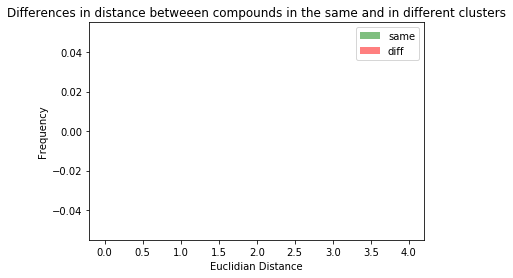

In [16]:
##Plotting the Two Distributions to find the best threshold to Seperate compounds
##in the same cluster compared to those in different clusters

plotdict=defaultdict(list)
for i in Same_diff_Dict:
    print(i,np.mean(Same_diff_Dict[i]),np.std(Same_diff_Dict[i]))
#Plot the two distributions and Save
bins=np.linspace(0,4.0,40)
plt.hist(Same_diff_Dict['same'],bins,alpha=0.5,color='green', label='same')
plt.hist(Same_diff_Dict['diff'],bins,alpha=0.5,color='red',label='diff')
plt.title('Differences in distance betweeen compounds in the same and in different clusters')
plt.legend()
plt.xlabel('Euclidian Distance')
plt.ylabel('Frequency')
if filetype=='Structure':
    plt.savefig('../compoundStructure/Clusters/DistanceDifferences_Random.png')
else:
    plt.savefig('../SEM/RandomClustering/DistanceDifferences_%s.png'%(filetype))
#plt.show()

In [ ]:
'Review_hDor':1.3, 'Review_hMor_Beta':

In [ ]:
    path='../SEM/Freq_matrices/FrequencyMatrix/'%(filetype)
    filecounter=0
    Same_diff_Dict={'same':[],'diff':[]}
    for filename in glob.glob(os.path.join(path,'*Average*')):#Loop over all random frequency matrices
        if filecounter<200:
            #print(filename)
            nameparts=filename.split('.')
            parts=nameparts[-2].split('/')
            #print(parts)
            temp_df=pd.read_csv(filename, sep='\t',header=0,index_col=0)
            temp_df.drop(list(temp_df)[-1], inplace=True, axis=1)

            randommatrix=temp_df.values
            randomcluster=KMeans(n_clusters=3).fit_predict(randommatrix)#Clustering the frequency matrix into 4 clusters. 4 Clusters were used in the actual data clustering as well, so the number of clusters should match between random and actual data. If # clusters changed in one, must be changed in both.

            threshdict=defaultdict(list)
            for pos1, compound1 in enumerate (temp_df.index.values): #For every compound in matrix
                for pos2, compound2 in enumerate (temp_df.index.values):#for Every compound in matrix
                    if compound1!=compound2:
                        #print(compound1, compound2, pos1, pos2)
                        #Calculate the distance between compound 1 and compound 2 using the array (row) of similarity values from the frequency matrix
                        tempdistance=distance.euclidean(np.array(randommatrix[pos1]),
                                                            np.array(randommatrix[pos2]))

                        if randomcluster[pos1]==randomcluster[pos2]:
                            #compounds are in the same cluster
                            Same_diff_Dict['same'].append(tempdistance)
                        else:
                            Same_diff_Dict['diff'].append(tempdistance)


        filecounter+=1

    plotdict=defaultdict(list)
    for i in Same_diff_Dict:
        print(i,np.mean(Same_diff_Dict[i]),np.std(Same_diff_Dict[i]))
    #Plot the two distributions and Save
    bins=np.linspace(0,4.0,40)
    plt.hist(Same_diff_Dict['same'],bins,alpha=0.5,color='green', label='same')
    plt.hist(Same_diff_Dict['diff'],bins,alpha=0.5,color='red',label='diff')
    plt.title('Differences in distance betweeen compounds in the same and in different clusters')
    plt.legend()
    plt.xlabel('Euclidian Distance')
    plt.ylabel('Frequency')
    if filetype=='Structure':
        plt.savefig('../compoundStructure/Clusters/DistanceDifferences_Random.png')
    else:
        plt.savefig('../SEM/RandomClustering/DistanceDifferences_%s.png'%(filetype))
    #plt.show()





In [ ]:
####Threshold for K=3
threshdict={'Review_hDor':1.25,'Review_h'}